<a href="https://colab.research.google.com/github/heli3199/Artificial-Intelligence/blob/main/PCA_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# ECE 57000 Assignment 2 Exercises



Name: Heliben Parikh

## Exercise 1 (10/100 points)

In this exercise, you will need to write a simple function that reverses and doubles the values in a list. For example: input `[1,2,3]`, output `[6,4,2]`.

In [ ]:
def reverse_double(list):

  # <YOUR CODE>
    new_list = list[::-1]
    le = len(list)
    for i in range(le):
      new_list[i] =2*new_list[i]
    return new_list


A = [2,5,3,9,7]
print(reverse_double(A))

[14, 18, 6, 10, 4]


## Exercise 2 (20/100 points)
In this exercise, you will need to help visualize several different distrubtions.

### Task 1

1.   Using numpy to generate a vector **D** with the following property:

  *   Each element is in a normal distribution. 
  *   Vector has the shape **2000x1**

2.   Reshape the vector **D** into **1000x2**

3.   Plot the graph in the following way:
  *   Create a figure of size 6 by 6
  *   Treat the two columns of the array **D** as the **x** and **y** coordinates of 2D points. Use [scatter()](https://matplotlib.org/3.2.2/api/_as_gen/matplotlib.pyplot.scatter.html) to visualize all the spots and set the marker size to be 1
  *   Let the plot shows the range `[-5,5]x[-5,5]`
  *   Give the plot a title (indicating the shape of **D**), and also label the x-axis and y-axis 

**Note:** It is always important to include necessary information (e.g. label, legend, title) so that readers won't get confused.




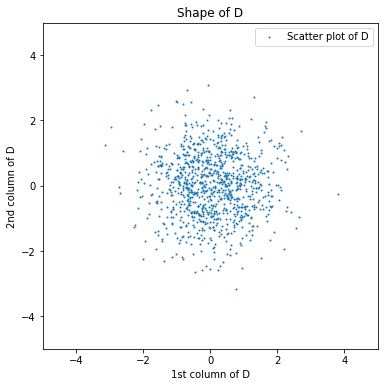

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

#  <YOUR CODE>
D = np.random.randn(2000,1)
D = D.reshape((1000,2))
x=D[:,0]
y=D[:,1]
#q=np.prod(y.shape)

plt.figure(figsize=(6,6))
plt.title("Shape of D")
plt.xlabel("1st column of D")
plt.ylabel("2nd column of D")
plt.xlim(-5,5)
plt.ylim(-5,5)
plt.scatter(x,y,s=1, label="Scatter plot of D")
plt.legend()

### Task 2

1. Create an array **R** = $$\begin{bmatrix} 0.25 & 0  \\ 0 & 1 \\  \end{bmatrix}$$
2. Compute **E** = **D** $\times$ **R**.
3. Repeat Step 3 above for **E**. (Title: shape of **E**)

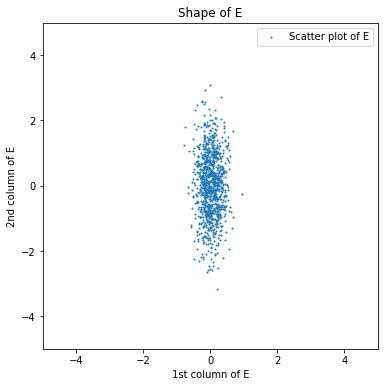

In [ ]:
#  <YOUR CODE>
R =[[0.25, 0], [0, 1]]

#E =np.zeros((1000,2))
E=np.matmul(D,R)
#for i in range(len(D)):  #second method
#  for j in range(len(R[0])):
#   for k in range(len(R)):
#      E[i][j] += D[i][k] * R[k][j]

x=E[:,0]
y=E[:,1]
#q=np.prod(y.shape)

plt.figure(figsize=(6,6))
plt.title("Shape of E")
plt.xlabel("1st column of E")
plt.ylabel("2nd column of E")
plt.xlim(-5,5)
plt.ylim(-5,5)
plt.scatter(x,y,s=1, label="Scatter plot of E")
plt.legend()

### Task 3

1. Create an array **R** = $$\begin{bmatrix} \sqrt(2)/2 & -\sqrt(2)/2  \\ \sqrt(2)/2 & \sqrt(2)/2 \\  \end{bmatrix}$$
2. Compute **F** = **E** $\times$ **R**.
3. Repeat Step 3 above for **F**. (Title: shape of **F**)

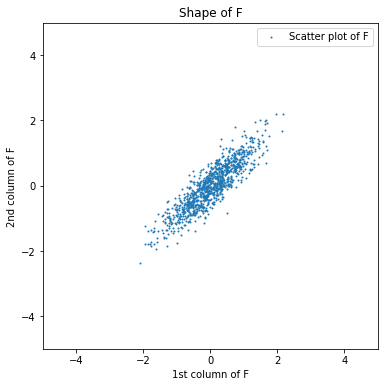

In [ ]:
#  <YOUR CODE>
R=[[(np.sqrt(2)/2), (-np.sqrt(2)/2)],[(np.sqrt(2)/2), (np.sqrt(2)/2)]]

#F =np.zeros((1000,2))
F = np.matmul(E,R)
#for i in range(len(E)):    # second method
#  for j in range(len(R[0])):
#    for k in range(len(R)):
#     F[i][j] += E[i][k] * R[k][j]

x=F[:,0]
y=F[:,1]
#q=np.prod(y.shape)

plt.figure(figsize=(6,6))
plt.title("Shape of F")
plt.xlabel("1st column of F")
plt.ylabel("2nd column of F")
plt.xlim(-5,5)
plt.ylim(-5,5)
plt.scatter(x,y,s=1, label="Scatter plot of F")
plt.legend()

## Exercise 3 (70/100 points)

### Task 1: Generate a sparse matrix

1. Generate a matrix **X** with size 100x50 with each element randomly picked from a uniform distribution **U**[0,1].
2. Use logical(boolean) indexing to set the elements in **X** to **0** whenever the value of the element is smaller than 0.85 (In this way, you should get the matrix to have roughly 85% of its elements zero's).
3. Use the function [csr_matrix()](https://docs.scipy.org/doc/scipy/reference/generated/scipy.sparse.csr_matrix.html#scipy.sparse.csr_matrix) to convert the matrix **X** into sparse matrix and call it **X_sparse**.



In [ ]:
import numpy as np
from scipy.sparse import csr_matrix

#  <YOUR CODE>
X = np.random.rand(100,50)
X[X<0.85] =0
#X=np.where(X<0.85,0,X) # np.where for indexing
#for i in range(len(X)):   # for loop for indexing
#  for j in range(len(X[0])):
#   if X[i][j] < 0.85:
#     X[i][j] = 0
X_sparse =csr_matrix(X)

print(f'X has type {type(X)} and has {100-np.sum(X!=0)/50}% of zeros')
print(f'X_sparse has type {type(X_sparse)} and has {100-np.sum(X_sparse!=0)/50}% of zeros')

X has type <class 'numpy.ndarray'> and has 85.72% of zeros
X_sparse has type <class 'scipy.sparse.csr.csr_matrix'> and has 85.72% of zeros


### Task 2: Construct the power iteration function

Following the algorithm in the instructions notebook, write a function that takes a sparse matrix **X** and number of iterations as input and returns the top right singular vector of the centered matrix as output. We have provided some starter code and you need to fill in the rest.

In [ ]:
def power_iter(X, num_iter:int):
   
  v = np.random.randn(X.shape[1])  # Initialize with random vector with shape (d,)
  one_vec = np.ones(X.shape[0])  # All ones vector with shape (n,)
  mu_row_matrix = np.mean(X, axis=0)  # Returns a 1 row matrix with shape (d, 1) since X is of "matrix" type 
  mu = np.array(mu_row_matrix).squeeze()  # Convert from a sparse column matrix to a dense 1D array with shape (d,)
  for i in range(num_iter):
    q = X.dot(v)
    r = mu.T.dot(v)
    t = one_vec.T.dot(one_vec)
    p = one_vec.T.dot(q)
    v1 = (X.T.dot(q)) - (mu.dot(p)) - ((X.T.dot(one_vec)).dot(r)) + (mu.dot(t).dot(r))
    n= np.linalg.norm(v1,2)
    v =v1/n
  return v
  #  <YOUR CODE>

v1_yours = power_iter(X_sparse,1000).squeeze()
print(v1_yours.shape)

(50,)


### Task 3: Verifying your top singular vector
Using any method you like to verify the vector that is computed by your function is indeed the top right singular vector of the **centered** data matrix.
First write another function that outputs the top right singular vector for sure (you can use the function [svd()](https://numpy.org/doc/stable/reference/generated/numpy.linalg.svd.html), note that it returns $V^T$ instead of $V$).
Then, the provided code will compute the mean absolute error (MAE) between the two functions you wrote.
(Note: The provided evaluation code will correct for the fact that the two vectors can be the negative of each other singular value decomposition is only unique up to signs).
The MAE should be close to machine precision (i.e., it should be less than about `1e-15`).

**Note:** This is for testing the correctness of your algorithm.
It is often a very good idea to write simple checks of your code as you write it to avoid bugs early on in your development process.
Do not worry about efficiency for this exercise. 

In [ ]:
from scipy.linalg import svd
def verify_v1(X):

  # Compute the top right singular vector using other methods
  #  <YOUR CODE>

  Xc = X - np.mean(X, axis =0)
  u, s, vh = svd(Xc)
  v = vh.T
  k = v[:,0]
  return k
  
  
# Note here we just pass in the dense 2D array `X`
#  which represents the same matrix as `X_sparse`
v1_simple = verify_v1(X).squeeze()
# Compute a sign corrected difference between the vectors
#  (accounting for the fact that SVD is only unique up to signs)
diff_sign_corrected = np.sign(v1_yours[0]) * v1_yours - np.sign(v1_simple[0]) * v1_simple
mae_corrected = np.mean(np.abs(diff_sign_corrected))
print(f'The average absolute difference of the two function output is {mae_corrected}')

The average absolute difference of the two function output is 1.4896677641429435e-15


### (Optional and ungraded, 0 points) Task 4: Going beyond

- In what scenarios we might find the power iteration method useful? 
  - Google's original ranking algorithm called "PageRank" uses a variant of this power iteration on very sparse graphs that represent connections between websites.  See [PageRank](https://en.wikipedia.org/wiki/PageRank).
- Can you optimize your algorithm further by avoiding reusing computations?
- Below, try your method with a much larger sparse X matrix (maybe 1000 x 1000 with 0.01% nonzeros, i.e. very sparse) and time the difference. For very short code snippets, you can use the `timeit` Python package or just use `time.time()` to capture the start and end times (subtracting them gets you the time in seconds).


Power iteration method can be use to find eigenvalues.